<a href="https://colab.research.google.com/github/sheraphineshovan/Data_Science_Miniprojects/blob/main/Santander_Customer_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries and data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
!unzip santander-customer-satisfaction.zip

Archive:  santander-customer-satisfaction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [ ]:
train.shape

(76020, 371)

In [ ]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [ ]:
train.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [ ]:
train=train.drop(['ID'],axis=1)

**Train and Test split**

In [ ]:
x=train.drop(['TARGET'],axis=1)
y=train['TARGET']

In [ ]:
print(x.shape)
print(y.shape)

(76020, 369)
(76020,)


<Axes: >

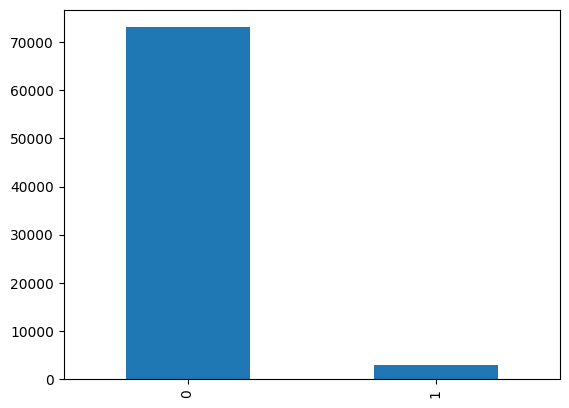

In [ ]:
y.value_counts().plot(kind='bar')

In [ ]:
from imblearn.combine import SMOTETomek
smote=SMOTETomek()
x,y=smote.fit_resample(x,y)

In [ ]:
def model_eval(actual,predicted):
  acc_score = accuracy_score(actual,predicted)
  cm_matrix = confusion_matrix(actual,predicted)
  class_rep = classification_report(actual,predicted)
  print("The accuracy is ", round(acc_score,2))
  print(cm_matrix)
  print(class_rep)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(106542, 369)
(35514, 369)
(106542,)
(35514,)


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred_ytrain_lr = lr.predict(x_train)
pred_ytest_lr = lr.predict(x_test)

In [ ]:
model_eval(y_train,pred_ytrain_lr)

The accuracy is  0.5
[[53087    64]
 [53383     8]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     53151
           1       0.11      0.00      0.00     53391

    accuracy                           0.50    106542
   macro avg       0.30      0.50      0.33    106542
weighted avg       0.30      0.50      0.33    106542



In [ ]:
model_eval(y_test,pred_ytest_lr)

The accuracy is  0.5
[[17863    14]
 [17633     4]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     17877
           1       0.22      0.00      0.00     17637

    accuracy                           0.50     35514
   macro avg       0.36      0.50      0.33     35514
weighted avg       0.36      0.50      0.34     35514



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier(max_depth=2,min_samples_split=3)
dtree.fit(x_train,y_train)
pred_ytrain_dtree = dtree.predict(x_train)
pred_ytest_dtree = dtree.predict(x_test)

In [ ]:
model_eval(y_train,pred_ytrain_dtree)

The accuracy is  0.79
[[46635  6516]
 [15981 37410]]
              precision    recall  f1-score   support

           0       0.74      0.88      0.81     53151
           1       0.85      0.70      0.77     53391

    accuracy                           0.79    106542
   macro avg       0.80      0.79      0.79    106542
weighted avg       0.80      0.79      0.79    106542



In [ ]:
model_eval(y_test,pred_ytest_dtree)

The accuracy is  0.79
[[15703  2174]
 [ 5289 12348]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81     17877
           1       0.85      0.70      0.77     17637

    accuracy                           0.79     35514
   macro avg       0.80      0.79      0.79     35514
weighted avg       0.80      0.79      0.79     35514



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rd = RandomForestClassifier(n_estimators=25,criterion='entropy',random_state=123)
rd.fit(x_train,y_train)
pred_ytrain_rd = rd.predict(x_train)
pred_ytest_rd = rd.predict(x_test)

In [ ]:
model_eval(y_train,pred_ytrain_rd)

The accuracy is  0.99
[[52090  1061]
 [  484 52907]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     53151
           1       0.98      0.99      0.99     53391

    accuracy                           0.99    106542
   macro avg       0.99      0.99      0.99    106542
weighted avg       0.99      0.99      0.99    106542



In [ ]:
model_eval(y_test,pred_ytest_rd)

The accuracy is  0.95
[[16911   966]
 [  813 16824]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     17877
           1       0.95      0.95      0.95     17637

    accuracy                           0.95     35514
   macro avg       0.95      0.95      0.95     35514
weighted avg       0.95      0.95      0.95     35514



AdaBoost Classsifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier(n_estimators=100,random_state=123)
ada.fit(x_train,y_train)
pred_ytrain_ada = ada.predict(x_train)
pred_ytest_ada = ada.predict(x_test)

In [ ]:
model_eval(y_train,pred_ytrain_ada)

The accuracy is  0.9
[[47399  5752]
 [ 4975 48416]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     53151
           1       0.89      0.91      0.90     53391

    accuracy                           0.90    106542
   macro avg       0.90      0.90      0.90    106542
weighted avg       0.90      0.90      0.90    106542



In [ ]:
model_eval(y_test,pred_ytest_ada)

The accuracy is  0.9
[[15974  1903]
 [ 1654 15983]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     17877
           1       0.89      0.91      0.90     17637

    accuracy                           0.90     35514
   macro avg       0.90      0.90      0.90     35514
weighted avg       0.90      0.90      0.90     35514



GradientBoosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier(max_depth=3,n_estimators=100,random_state=123,min_samples_split=2,learning_rate=1.0)
gb.fit(x_train,y_train)
pred_ytrain_gb = gb.predict(x_train)
pred_ytest_gb = gb.predict(x_test)

In [ ]:
model_eval(y_train,pred_ytrain_gb)

The accuracy is  0.94
[[49670  3481]
 [ 3247 50144]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     53151
           1       0.94      0.94      0.94     53391

    accuracy                           0.94    106542
   macro avg       0.94      0.94      0.94    106542
weighted avg       0.94      0.94      0.94    106542



In [ ]:
model_eval(y_test,pred_ytest_gb)

The accuracy is  0.93
[[16632  1245]
 [ 1146 16491]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     17877
           1       0.93      0.94      0.93     17637

    accuracy                           0.93     35514
   macro avg       0.93      0.93      0.93     35514
weighted avg       0.93      0.93      0.93     35514



Precting Target for Test data

In [ ]:
test = test.drop(['ID'], axis=1)

In [ ]:
# in all the models that's implemented above Random Forest performs well
test_y = rd.predict(test)

In [ ]:
test_y

array([0, 0, 0, ..., 0, 0, 0])